<h2> Efektywność obliczeń </h2>

To jak napiszemy kod często decyduje o wydajności, czyli szybkości wykonywania kodu.

Każde zadanie można rozwiązać na wiele sposobów i choć działają, nie wszystkie są dobre.

Często popełniane błędy potrafią wydłużyć wykonywanie kodu nawet kilkusetkrotnie.

<b> Najwolniejsze w Pythonie są pętle </b>

In [8]:
import time

In [9]:
start = time.time()
end = time.time()
print(end-start)

0.0


In [10]:
start = time.time()

for n in range(1,10000):
    n**n

end = time.time()
print(end-start)

10.973047256469727


Rozważmy taki przypadek: na farmę przyjechała para królików. Każda para jest w stanie wydać codziennie na świat jednego potomka. Ile królików będzie na farmie po <i>n</i> dniach?

In [136]:
#Sposób 1:
#Złożoność: n
def ile_krolikow(n):
    licz_krolikow = 2 #mamy dwa kroliki
    for dzien in range(1,n+1): #od dnia 1 do n+1
        licz_krolikow += divmod(licz_krolikow,2)[0] #powieksz o liczbe par
    return licz_krolikow

start = time.time()
ile_krolikow(100)
end = time.time()
print("{:.7f}us".format((end-start)*1000000))

497.3411560us


In [137]:
[ile_krolikow(n) for n in range(10)]

[2, 3, 4, 6, 9, 13, 19, 28, 42, 63]

In [6]:
#Sposób 2:
#Złożoność n^2
def ile_krolikow(n):
    licz_krolikow = 2 #mamy dwa kroliki
    for dzien in range(1,n+1): #od dnia 1 do n+1
        for kroliki in range(1,int(licz_krolikow/2)+1):
            licz_krolikow += 1#powieksz o liczbe par
    return licz_krolikow

start = time.time()
ile_krolikow(50)
end = time.time()
print("{:.4f}ms".format((end-start)*1000))

70656.7299ms


In [3]:
[ile_krolikow(n) for n in range(10)]

[2, 3, 4, 6, 9, 13, 19, 28, 42, 63]

Przykład 2: Janek od dziś odkłada po złotówce do skarbonki codziennie. Ile będzie miał złotych po n dniach?

In [11]:
#Złożoność n
def pln1(n):
    pln = 0
    for dzien in range(1, n+1):
        for zlotowki in range(dzien):
            pln += 1
    return pln


start = time.time()
pln1(10000)
end = time.time()
print("{:.4f}ms".format((end-start)*1000))

5322.1178ms


In [24]:
#Złożoność n
def pln2(n):
    pln = 0
    for dzien in range(1, n+1):
            pln += dzien
    return pln


start = time.time()
pln2(10000)
end = time.time()
print("{:.4f}ms".format((end-start)*1000))

0.9921ms


In [29]:
#Złożoność 1
def pln3(n):
    return n * (n+1) // 2

start = time.time()
pln3(100000)
end = time.time()
print("{:.4f}ns".format((end-start)*100000000))

49543.3807ns


In [50]:
#Złożoność n
def pln4(n):
    return sum(range(n+1))

start = time.time()
pln4(10000)
end = time.time()
print("{:.4f}ms".format((end-start)*1000))

0.4964ms


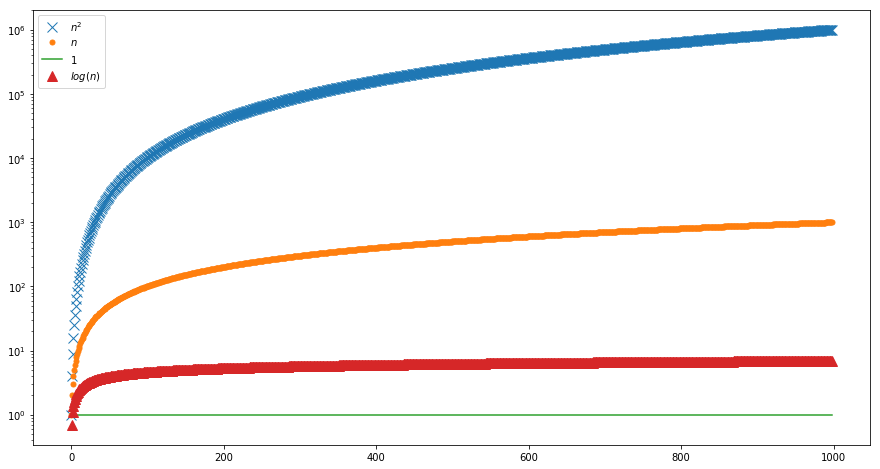

In [31]:
import matplotlib.pyplot as plt
import math
%matplotlib inline
n2 = [n**2 for n in range(1,1000)]
n = [n for n in range(1,1000)]
s = [1 for n in range(1,1000)]
nlog = [math.log(n) for n in range(1,1000)]
plt.figure(figsize=(15,8))
plt.plot(n2, 'x', markersize = 10, label = "$n^2$")
plt.plot(n, '.', markersize = 10, label = "$n$")
plt.plot(s, '-', markersize = 10, label = "$1$")
plt.plot(nlog, '^', markersize=10, label = "$log(n)$")
plt.yscale("log")
plt.legend()

<h1> Moduły </h1>

Aby uporządkować kod, możemy rozbić go na moduły, które przechowują pewne funkcjonalności i w razie potrzeby są wywoływane.

Dzięki temu unikamy definiciji wszystkich funkcji w pamięci za jednym razem, a jedynie wywołujemy wyłącznie potrzebne funkcje.

W ten sposób pisane są biblioteki programistyczne.

In [86]:
from IPython.display import Image
Image(url = 'modules.png')

Dokładnie w taki sam sposób w jaki importujemy biblioteki, mogą być importowane nasze własne moduły.

Moduły również dokumentujemy!

<h2> Własne moduły i bilioteki (paczki)</h2>

Jeśli zatem chcemy napisać własną bibliotekę(a będziemy to robić), to musi ona zawierać pewne ustalone pliki.

Jeśli nasz kod zawiera funkcję $__main__$ należy pamiętać, że kod pod tą funkcją wykonwa się <b> w czasie importowania biblioteki!</b>. Czasem to bardzo użyteczna funkcja mająca na celu przygotować pewne zmienne.

Biblioteka/paczka - aby była rozpoznawalna przez Pythona musi zawierać plik <b>$__init.py__$</b> - nawet jeśli jest pusty. Bez jego obecności paczka nie zostanie zinterpretowana jako bilbioteka.

<h2> Uwaga na nazwy! </h2>

W Pythonie można nadpisać wszystko, a i dzięki temu można zmienić zachowanie podstawowych funkcji.

Przy imporcie funkcji z różnich bibliotek o tej samej nazwie:

In [91]:
import math
import cmath
print(math.sqrt(4))
print(cmath.sqrt(4))

2.0
(2+0j)


In [92]:
from math import sqrt
from cmath import sqrt
print(sqrt(4))
print(sqrt(4))

(2+0j)
(2+0j)


Nadpisać możemy nawet typy wbudowane!

In [97]:
def list(parametr1):
    return "NADPISAŁEM LISTĘ HAHAHAHA!"

In [98]:
a = (1,2,3)
a

(1, 2, 3)

In [32]:
a = list(a)
print(a)

list = 3
a = (1,2,3)
list(a)

TypeError: 'function' object is not iterable

In [33]:
%reset #reset zmiennych w Jupyter

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  #reset, please run `%reset?` for details
Don't know how to reset  zmiennych, please run `%reset?` for details
Don't know how to reset  w, please run `%reset?` for details
Don't know how to reset  jupyter, please run `%reset?` for details


In [135]:
class Test():
    
    def __init__(self,a):
        self.a = a
    
    def __int__(self,other):
        return self.a + other.a + 1


In [139]:
int(2)+int(2)

5

In [140]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
